In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import math
rcParams['figure.figsize'] = 10, 10

In [2]:
mu = 0.1
r = 0.05
sigma = 0.2
delT = 1.0/365
T=180
S0 = 100

def get_stock_prices(part):
    S1, S2 = np.ndarray(T+1), np.ndarray(T+1)
    S1[0], S2[0] = 100.0, 100.0
    for i in range(1,T+1):
        W =  math.sqrt(delT)*np.random.randn()
        S1[i] = S1[i-1]*np.exp(sigma*W + (r-0.5*(sigma**2))*delT)
        if part == 'A': 
            # return risk neutral and real world stock prices
            S2[i] = S2[i-1]*np.exp(sigma*(W) + (mu-0.5*(sigma**2))*delT)
        else:   
            # return variance reduction stock prices
            S2[i] = S2[i-1]*np.exp(sigma*(-W) + (r-0.5*(sigma**2))*delT)
    return S1[1:],S2[1:]

def stock_simulation():
    fig = plt.figure() 
    plt1 = fig.add_subplot(211) 
    plt2 = fig.add_subplot(212) 
    for _ in range(10):
        Srn, S = get_stock_prices('A')
        plt1.plot(Srn)
        plt2.plot(S)
    plt1.set_xlabel('Time Steps')
    plt1.set_ylabel('Stock price')
    plt2.set_xlabel('Time Steps')
    plt2.set_ylabel('Stock price')
    plt1.set_title('10 stock simulation paths in Risk Neutral World')
    plt2.set_title('10 stock simulation paths in Real World')
    plt.show()

def stock_simulation_compare():
    Srn, S = get_stock_prices('A')
    plt.figure()
    plt.plot(S)
    plt.plot(Srn)
    plt.legend(['real','risk neutral'])
    plt.title('Comparison of stock price in real and risk neutral world')
    plt.show()

def option_price(m,K,option):
    payoffSum1, payoffSum2 = 0, 0
    for i in range(m):
        Splus, Sminus = get_stock_prices('B')
        Yplus = np.mean(Splus)
        Yminus = np.mean(Sminus)
        if option=='call':
            payoff1 = max(0,Yplus-K)
            payoff2 = 0.5*(max(0,Yplus-K) + max(0,Yminus-K))
        else:
            payoff1 = max(0,K-Yplus)
            payoff2 = 0.5*(max(0,K-Yplus) + max(0,K-Yminus))    
        payoffSum1 = payoffSum1 + payoff1 
        payoffSum2 = payoffSum2 + payoff2
    return np.exp(-r*delT*T)*(payoffSum1/m), np.exp(-r*delT*T)*(payoffSum2/m)

def option_price_sensitivity_analysis(option):
    for K in [105,110,90]:
        a1, a2 = [], []
        for i in range(500,3000,500):
            without_var_red, with_var_red = option_price(i,K,option)
            a1.append(without_var_red)
            a2.append(with_var_red )
        print(option + ' option price for K = '+ str(K) +' is '+ str(np.round_(np.mean(a2), 5)))
        plt.figure()
        plt.plot(a1)
        plt.plot(a2)
        plt.xlabel('# of simulations')
        plt.ylabel('option price')
        plt.title(option + ' option price sensitivity analysis for K = '+ str(K))
        plt.show()


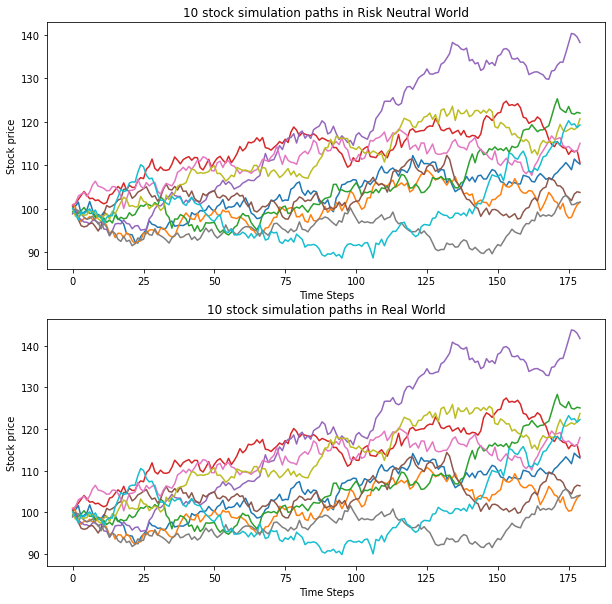

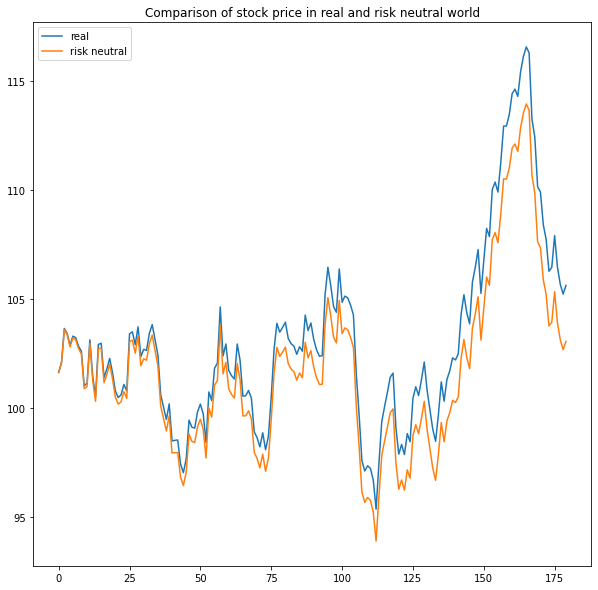

call option price for K = 105 is 1.77627


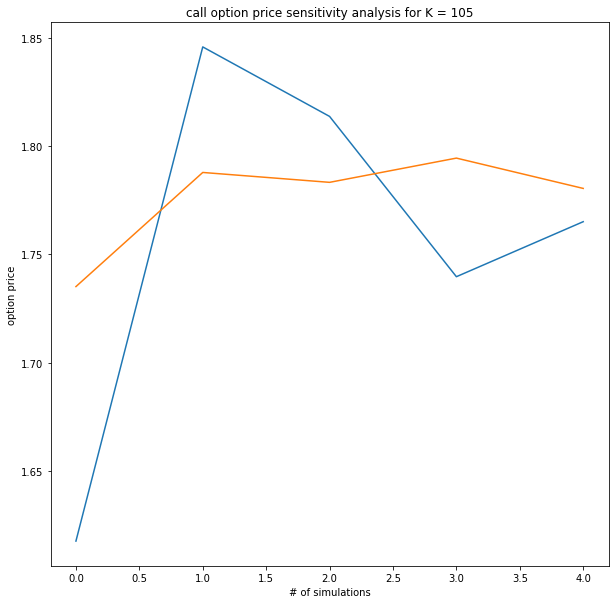

call option price for K = 110 is 0.68596


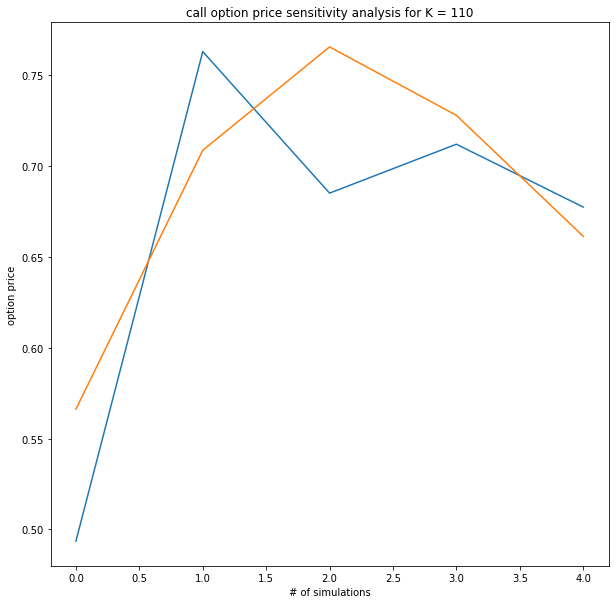

call option price for K = 90 is 11.23084


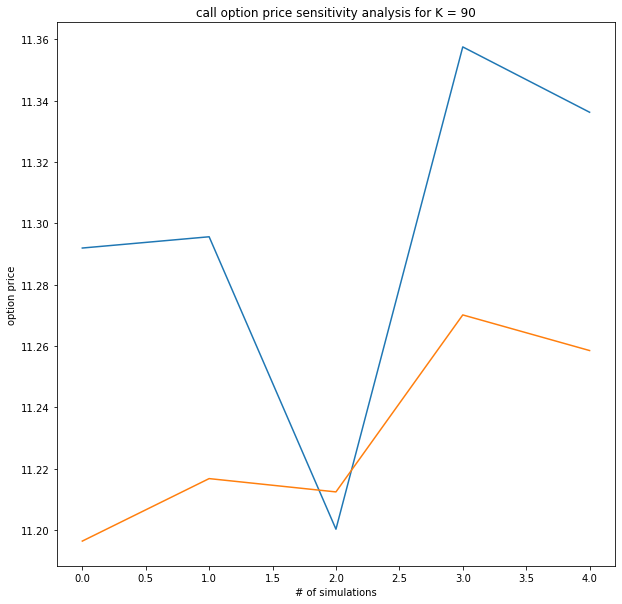

put option price for K = 105 is 5.43337


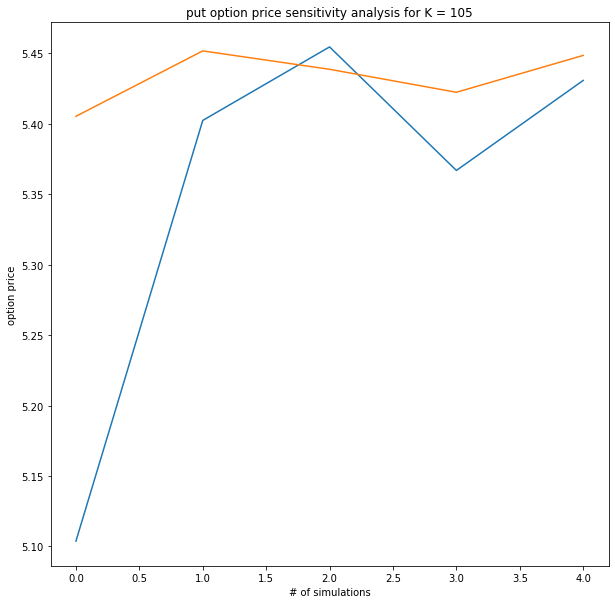

put option price for K = 110 is 9.22485


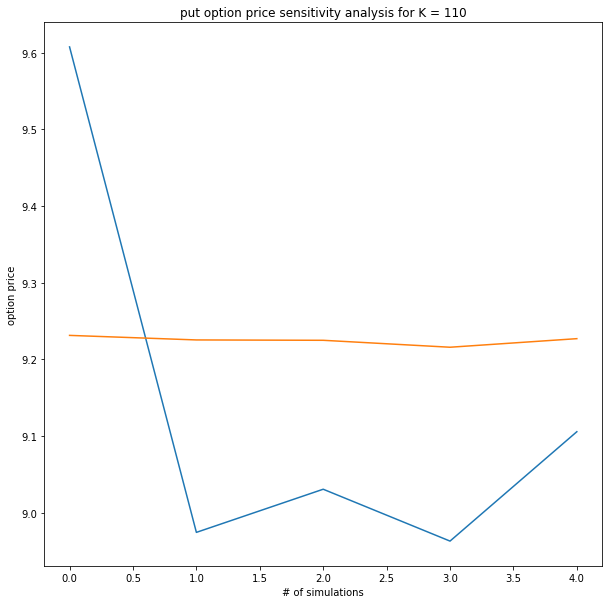

put option price for K = 90 is 0.25365


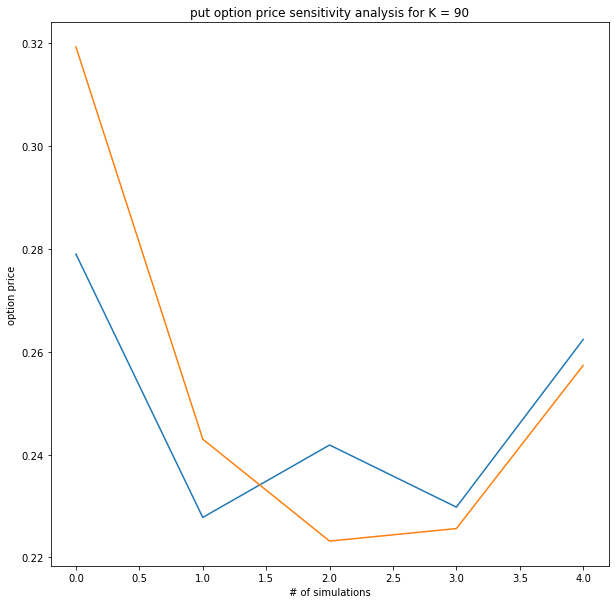

In [3]:
stock_simulation()
stock_simulation_compare()
option_price_sensitivity_analysis('call')
option_price_sensitivity_analysis('put')
